In [144]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [145]:
data = pd.read_excel('_cotacoes_completa_diario.xlsx')
filter_col = [col for col in data if col.startswith('close')]
dados = data[filter_col].copy()
rsi_period = 14
l_name = []
banana = dados.copy()
for i in dados:
    a = str(i).split()[1]
    chg = dados[i].diff(1) #variação em 1 vela
    gain = chg.mask(chg<0,0) #pega somente as changes positivas
    loss = chg.mask(chg>0,0) #pega somente as changes negativas
#     dados['gain'] = gain
#     dados['loss'] = loss
    avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean() #exponential weighted function
    avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
    rs = abs(avg_gain/avg_loss)
    rsi = 100-(100/(1+rs))
    dados['RSI '+a] = rsi

In [146]:
"""
cotacoes = dados[rsi_ticker]
opera(cotacoes)
"""
def opera(dados_rsiticker, gain):
    dic[_ticker] = {}
    dic[_ticker]['Qnt Trades'] = 0
    dic[_ticker]['Resultado'] = 0
    dic[_ticker]['Periodo Carregando'] = []

    posicao = 0 #vendido/neutro/comprado
    resultado = 0 
    preco_venda = 0
    carteira = 0
    _carteira = 0 #carteira provisória pra evitar bug
    dias_carregando = 0

    for i in dados_rsiticker.index:
        rsi = dados_rsiticker[dados_rsiticker.index == i].values[0]
        preco_acao = dados[ticker][dados[ticker].index == i].values[0]
        #comprar
        
        if rsi >= 70:
            if posicao == 0: #só compra se estiver neutro
                posicao -=1 #agora está comprado em 1
                preco_venda = preco_acao #salva o preço de compra
                _carteira += preco_acao #desconta na carteira o valor da ação
                 #print(f'comprou {a} a: {preco_compra}')     
                dias_carregando = i

        #zerar
        elif preco_venda - preco_acao >= gain*preco_venda and posicao == -1:
            #se tiver comprado e lucro de 4%
            _carteira -= preco_acao #credita o valor da ação vendida
            posicao += 1
            dic[_ticker]['Qnt Trades'] += 1
            carteira = _carteira
            dic[_ticker]['Periodo Carregando'].append(i-dias_carregando)
            dias_carregando = 0 

    dic[_ticker]['Resultado'] = carteira
    return dic  

In [154]:
doc = {}
l = [.005,.01,.03]
#posicao 1 - comprado,
#0 - neutro, 
#(-1) - vendido

#seleciona os tickers com 'Close'
for pct in l:
    valor_carteira = 0
    dic = {}
    for ticker in dados.iloc[:,1:54]:
        _ticker = (ticker.split()[1])
        rsi_ticker = ('RSI '+_ticker)
        cotacoes = dados[rsi_ticker]        
        opera(cotacoes,pct) #executa função para compra e venda para cada acao
        doc[str(pct)] = dic

In [155]:
#deixa no formato para saber o resultado - quantidade/financeiro
total_operacoes = {}
lista_operacoes = []
lista_resultados = []
total_resultado = {}
lista_tempo = []
total_tempo = {}
for k,v in doc.items():
    for a,b in v.items():
        lista_operacoes.append(b['Qnt Trades'])
        lista_resultados.append(b['Resultado'])
        for temp in b['Periodo Carregando']:
            lista_tempo.append(temp)
        
    total_operacoes[str(k)] = lista_operacoes
    total_resultado[str(k)] = lista_resultados
    total_tempo[str(k)] = lista_tempo
    #reseta listas
    lista_operacoes = []
    lista_resultados = []
    lista_tempo = []


In [202]:
for k,v in total_operacoes.items():
    s = np.sum(v)
    m = np.mean(v)
    std = np.std(v)
    print(f'Resumo trades para pct: {k}')
    print(f'sum: {s:.2f} mean: {m:.2f} desvio padrao: {std:.2f}\n')

Resumo trades para pct: 0.005
sum: 679.00 mean: 12.81 desvio padrao: 7.30

Resumo trades para pct: 0.01
sum: 606.00 mean: 11.43 desvio padrao: 6.38

Resumo trades para pct: 0.03
sum: 352.00 mean: 6.64 desvio padrao: 3.98



In [157]:
for k,v in total_resultado.items():
    s = np.sum(v)
    m = np.mean(v)
    std = np.std(v)
    print(f'Resumo trades para pct: {k} (volume de 1 ação)')
    print(f'sum: ${s:.2f} mean: ${m:.2f} desvio padrao: ${std:.2f}\n')

Resumo trades para pct: 0.005 (volume de 1 ação)
sum: $202.04 mean: $3.81 desvio padrao: $3.09

Resumo trades para pct: 0.01 (volume de 1 ação)
sum: $213.56 mean: $4.03 desvio padrao: $3.21

Resumo trades para pct: 0.03 (volume de 1 ação)
sum: $205.66 mean: $3.88 desvio padrao: $3.24



In [158]:
for k,v in total_tempo.items():
    s = np.sum(v)
    m = np.mean(v)
    std = np.std(v)
    print(f'Resumo trades para pct: {k} (volume de 1 ação)')
    print(f'Sum: {s:.2f} dias  | Mean: {m:.2f} dias | Desvio Padrao: {std:.2f} dias\n')

Resumo trades para pct: 0.005 (volume de 1 ação)
Sum: 23725.00 dias  | Mean: 34.94 dias | Desvio Padrao: 152.10 dias

Resumo trades para pct: 0.01 (volume de 1 ação)
Sum: 25458.00 dias  | Mean: 42.01 dias | Desvio Padrao: 164.48 dias

Resumo trades para pct: 0.03 (volume de 1 ação)
Sum: 27961.00 dias  | Mean: 79.43 dias | Desvio Padrao: 230.71 dias



Resumo trades para pct: 0.05
sum: 266.00 mean: 5.02 desvio padrao: 3.12

Resumo trades para pct: 0.15
sum: 113.00 mean: 2.13 desvio padrao: 1.93

Resumo trades para pct: 0.3
sum: 55.00 mean: 1.04 desvio padrao: 1.32

Resumo trades para pct: 0.05 (volume de 1 ação)
Sum: 27951.00 dias  | Mean: 105.08 dias | Desvio Padrao: 264.29 dias

Resumo trades para pct: 0.15 (volume de 1 ação)
Sum: 27145.00 dias  | Mean: 240.22 dias | Desvio Padrao: 400.03 dias

Resumo trades para pct: 0.3 (volume de 1 ação)
Sum: 21413.00 dias  | Mean: 389.33 dias | Desvio Padrao: 461.01 dias

Resumo trades para pct: 0.05 (volume de 1 ação)
sum: $208.75 mean: $3.94 desvio padrao: $3.35

Resumo trades para pct: 0.15 (volume de 1 ação)
sum: $223.61 mean: $4.22 desvio padrao: $5.01

Resumo trades para pct: 0.3 (volume de 1 ação)
sum: $227.37 mean: $4.29 desvio padrao: $6.62

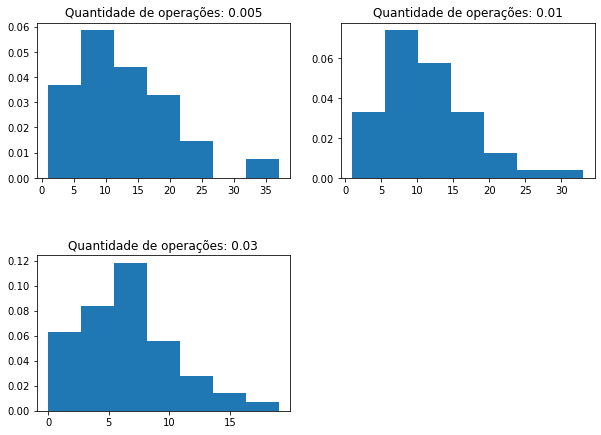

In [236]:
import matplotlib
fig = plt.figure(figsize=(10, 20))
contador =1

for k,v in total_operacoes.items():
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
    plt.subplot(5, 2, contador)
    contador +=1
    plt.title(("Quantidade de operações: "+k))
    plt.hist(v,density=True,bins=7)
        
plt.show()

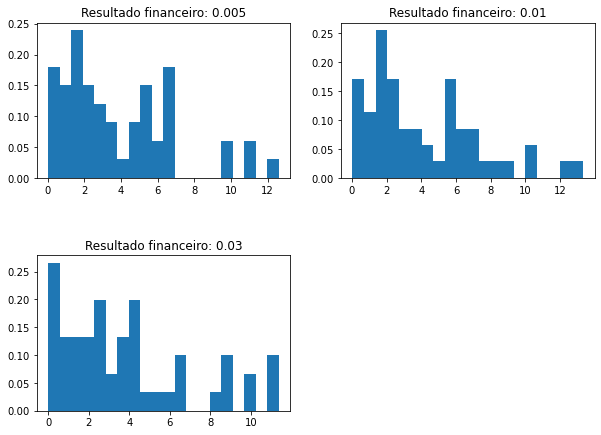

In [248]:
fig = plt.figure(figsize=(10, 20))
contador =1
for k,v in total_resultado.items():
    matplotlib.pyplot.subplots_adjust(hspace=.5)
    plt.subplot(5, 2, contador)
    contador +=1
    plt.title(("Resultado financeiro: "+k))
    plt.hist(v,density=True,bins=20)

In [263]:
# import scipy.stats as st
# fig = plt.figure(figsize=(10, 20))
contador =1
for k,v in total_tempo.items():
    a = pd.DataFrame(v)
    print(a.describe())
#     print(v)
    
#     matplotlib.pyplot.subplots_adjust(hspace=.5)
#     plt.subplot(5, 2, contador)
#     contador +=1
#     plt.title(("Tempo de carregamento: "+k))
#     plt.hist(v,density=True,bins=5,range=[1,30])

                 0
count   679.000000
mean     34.941090
std     152.216745
min       1.000000
25%       1.000000
50%       2.000000
75%       7.000000
max    1877.000000
                 0
count   606.000000
mean     42.009901
std     164.612261
min       1.000000
25%       1.000000
50%       3.000000
75%      11.000000
max    1879.000000
                 0
count   352.000000
mean     79.434659
std     231.043073
min       1.000000
25%       3.000000
50%       9.000000
75%      47.750000
max    2062.000000
